### 1. Customer Churn Prediction

In [149]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"C:\Code\CustomerChurn-main\WA_Fn-UseC_-Telco-Customer-Churn.csv")

### 2. Data Overviewing and Cleaning

In [150]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [151]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [152]:
#find unique number
len(data.customerID.unique())

7043

In [153]:
#change totalcharge data type

data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors= 'coerce')

In [154]:
#check null
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [155]:
#drop null
data= data.dropna()

In [156]:
#recheck null
data.isnull().sum()
#data.dtypes

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [157]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### 3. Data Exploration

In [158]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [159]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = data.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(data)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

### 4. Churn

C:\Users\mruna\AppData\Local\Temp\ipykernel_18572\1772755695.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=data['Churn'], palette='Spectral')


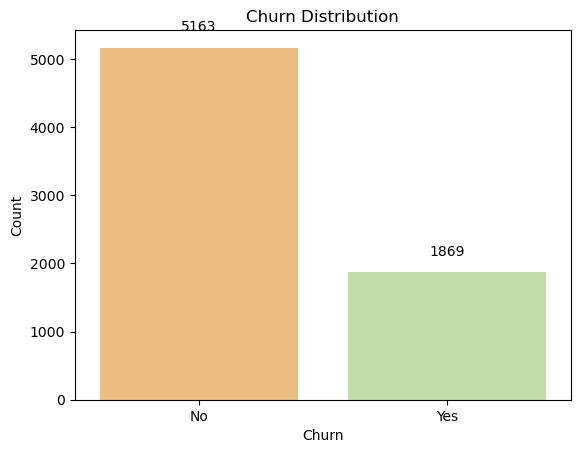

In [160]:
g = sns.countplot(x=data['Churn'], palette='Spectral')

# Annotate each bar with its count
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='center', 
               xytext=(0, 15), 
               textcoords='offset points')

plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Churn Distribution")

plt.show()

In [161]:
data.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

### 5. Payment Method

C:\Users\mruna\AppData\Local\Temp\ipykernel_18572\3835370541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pm = sns.countplot(x=data['PaymentMethod'], palette='Spectral')


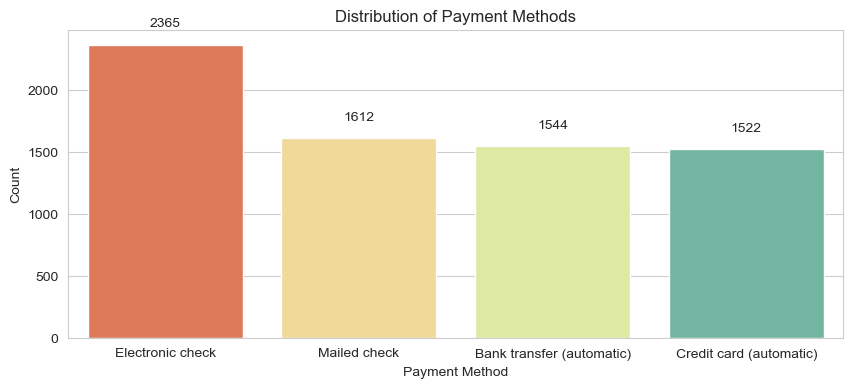

In [288]:
plt.figure(figsize=(10, 4))
pm = sns.countplot(x=data['PaymentMethod'], palette='Spectral')

# Annotate each bar with its count
for p in pm.patches:
    pm.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 15), 
                textcoords='offset points')

plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Distribution of Payment Methods")

plt.show()

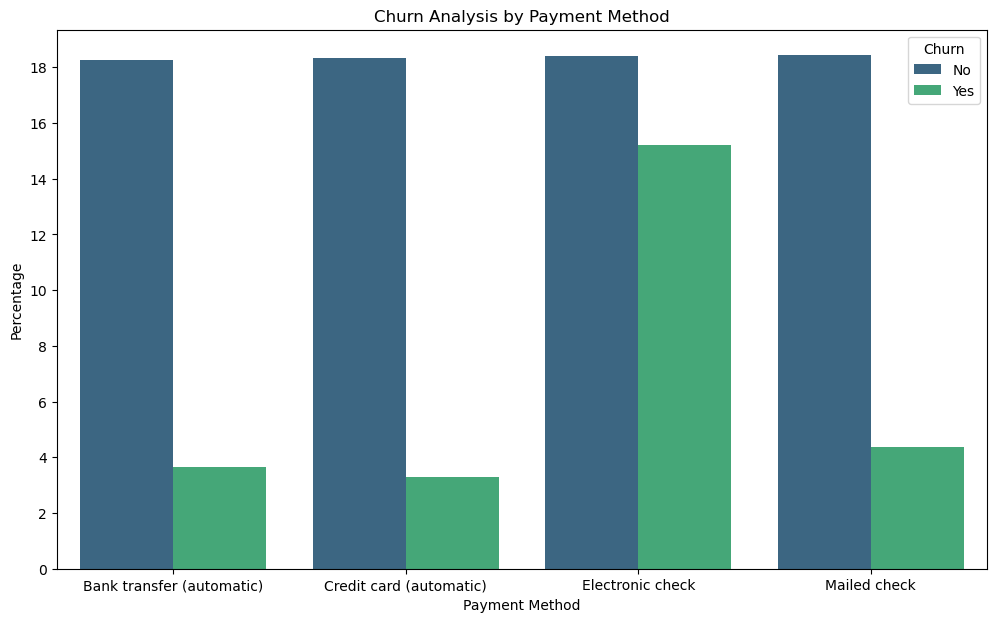

In [163]:
percentage_data = data.groupby(["PaymentMethod", "Churn"]).size() / len(data) * 100
percentage_data = percentage_data.reset_index(name="Percentage")

# Plot the bar chart with percentage on the y-axis
plt.figure(figsize=(12, 7))

sns.barplot(x="PaymentMethod", y="Percentage", hue="Churn", data=percentage_data, palette="viridis")

plt.xlabel("Payment Method")
plt.ylabel("Percentage")
plt.title("Churn Analysis by Payment Method")

# Set y-axis ticks with a 2% difference
plt.yticks(range(0, int(percentage_data["Percentage"].max()) + 2, 2))

plt.show()

### 6. Senior Citizen


In [164]:
data['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

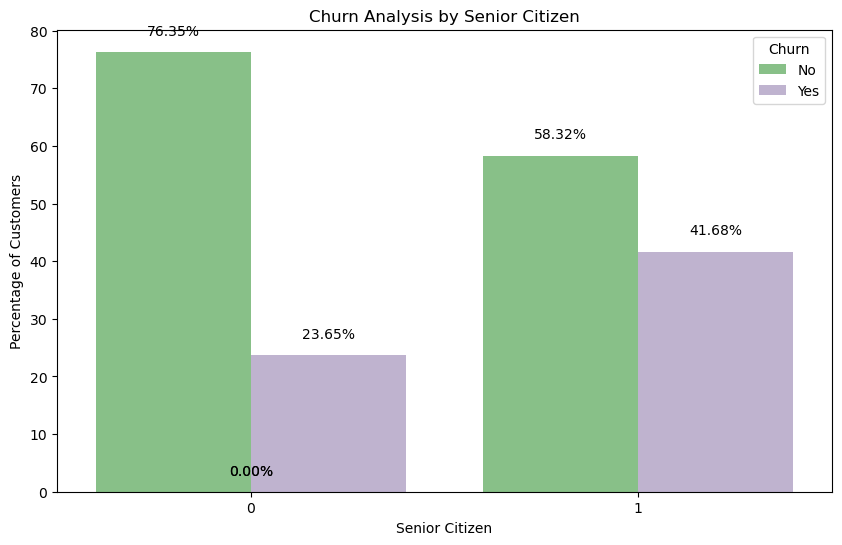

In [176]:
gp_partner = data.groupby('SeniorCitizen')["Churn"].value_counts(normalize=True) * 100
gp_partner = gp_partner.rename("Percentage of Customers").reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='SeniorCitizen', y='Percentage of Customers', data=gp_partner, hue='Churn', palette='Accent')

# Annotate each bar with its percentage
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 15), 
                textcoords='offset points')

plt.xlabel("Senior Citizen")
plt.ylabel("Percentage of Customers")
plt.title("Churn Analysis by Senior Citizen")

plt.show() 

c:\Users\mruna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\mruna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


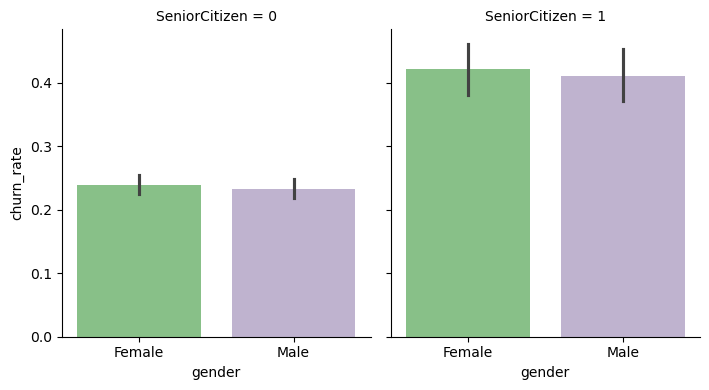

In [177]:
data['churn_rate'] = data['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(data, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Accent", order= ['Female', 'Male'])

### 7. Partner

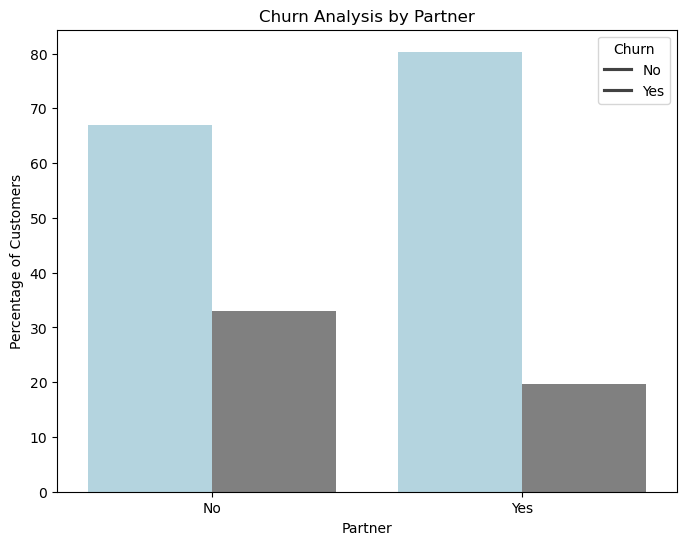

In [196]:
axis_y = "Percentage of Customers"  # Updated y-axis label
colors = ['lightblue', 'grey']
customPalette = sns.set_palette(sns.color_palette(colors))

# Calculate the percentage of customers for each 'Partner' group and 'Churn' status
gp_partner = data.groupby('Partner')["Churn"].value_counts(normalize=True) * 100
gp_partner = gp_partner.rename(axis_y).reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Partner', y=axis_y, data=gp_partner, hue='Churn', palette=customPalette)

plt.xlabel("Partner")
plt.ylabel(axis_y)  # Set y-axis label
plt.title("Churn Analysis by Partner")
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])

plt.show()

### 8. Dependents


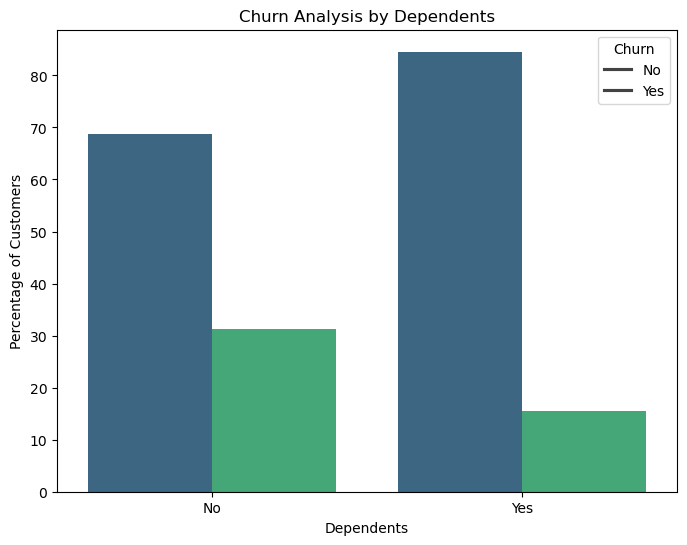

In [195]:
axis_y = "Percentage of Customers"

# Calculate the percentage of customers for each 'Dependents' group and 'Churn' status
gp_dep = data.groupby('Dependents')["Churn"].value_counts(normalize=True) * 100
gp_dep = gp_dep.rename(axis_y).reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Dependents', y=axis_y, hue='Churn', data=gp_dep, palette="viridis")

# Set y-axis label
ax.set_ylabel(axis_y)

plt.xlabel("Dependents")
plt.title("Churn Analysis by Dependents")
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])

plt.show()

### 9. Internet Service


In [186]:
data.groupby('InternetService').size()

InternetService
DSL            2416
Fiber optic    3096
No             1520
dtype: int64

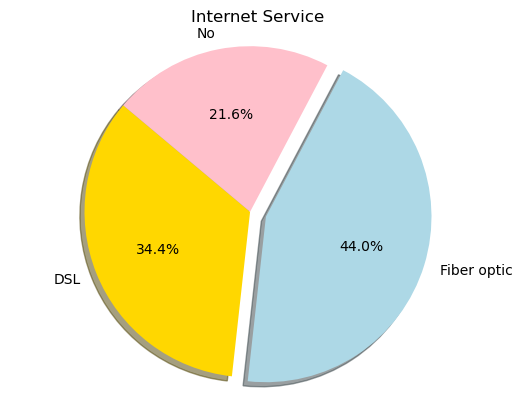

In [187]:
labels = 'DSL', 'Fiber optic', 'No'
sizes = [2416, 3096, 1520]
colors = ['gold', 'lightblue', 'pink']
explode = (0, 0.1, 0)

# Plot
plt.pie(sizes, explode= explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Internet Service')
plt.axis('equal')
plt.show()

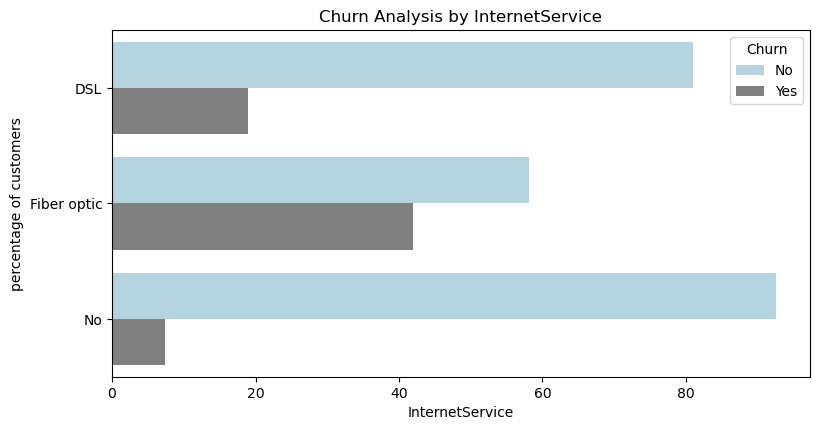

In [194]:
def barplot_percentages(feature, orient, axis_name):
    g = data.groupby(feature)["Churn"].value_counts(normalize=True).mul(100).rename(axis_name).reset_index()
    
    if orient == 'v':
        ax = sns.barplot(x=feature, y=axis_name, hue='Churn', data=g, orient=orient)
    else:
        ax = sns.barplot(x=axis_name, y=feature, hue='Churn', data=g, orient=orient)

    ax.set_ylabel(axis_name)
    plt.xlabel(feature)
    plt.title(f"Churn Analysis by {feature}")

    plt.show()

# Call the function without annotation
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h", axis_name="percentage of customers")
plt.show()

### 10. Customer Distribution


In [197]:
data.groupby('gender').size()

gender
Female    3488
Male      3555
dtype: int64

In [198]:
data.groupby('SeniorCitizen').size()

SeniorCitizen
0    5901
1    1142
dtype: int64

In [199]:
data.groupby('Partner').size()

Partner
No     3641
Yes    3402
dtype: int64

In [200]:
data.groupby('Dependents').size()

Dependents
No     4933
Yes    2110
dtype: int64

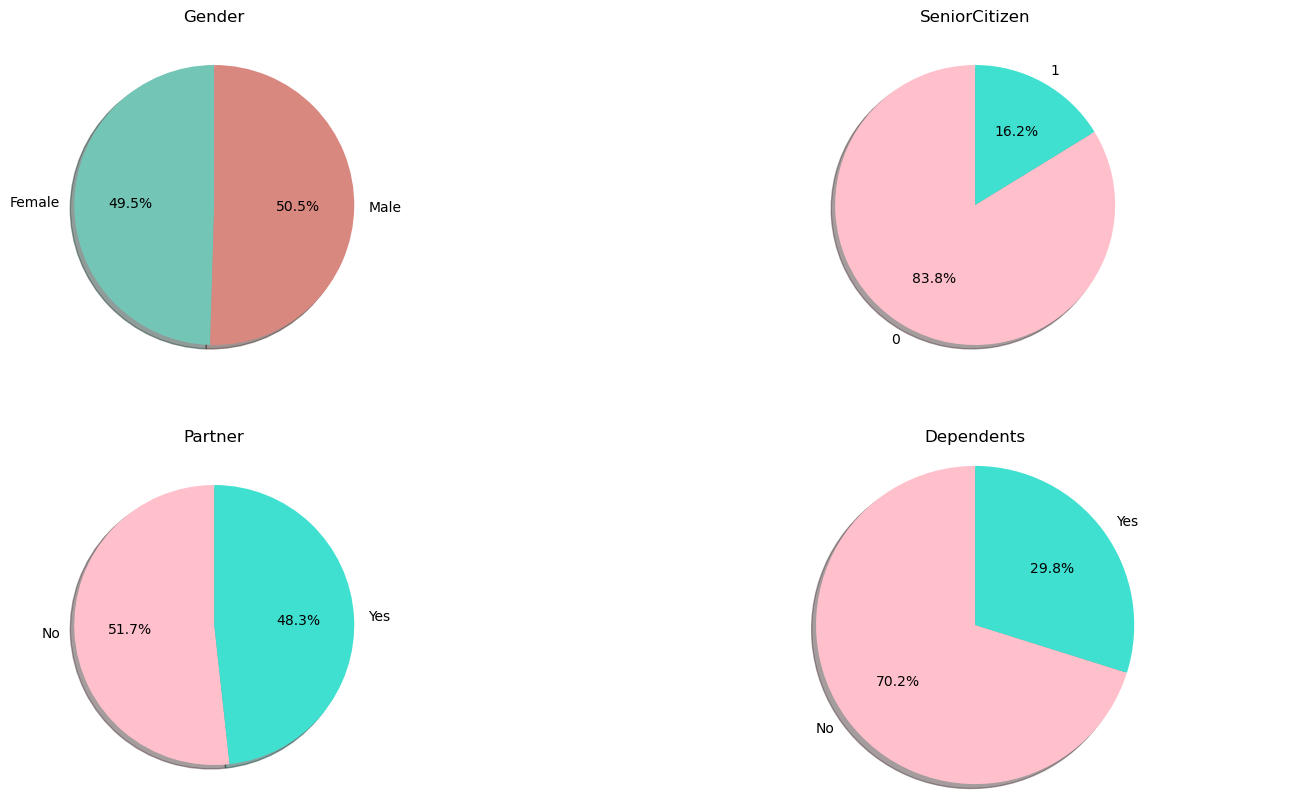

In [201]:
fig = plt.figure(figsize=(18,10), dpi=100)

labels= ['Female','Male']
size= [3483,3549]
colors= ['#73C6B6', '#D98880']

ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(size, labels=labels, colors= colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Gender')

#############################################

labels= ['0','1']
size= [5890,1142]
colors= ['pink', 'turquoise']

ax2 = plt.subplot2grid((2,2),(0,1))
plt.pie(size, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('SeniorCitizen')

#####################################################

labels= ['No','Yes']
size= [3639,3393]
color= ['red', 'blue']

ax3 = plt.subplot2grid((2,2),(1,0))
plt.pie(size, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Partner')

###################################################################

labels= ['No','Yes']
size= [4933,2099]
color= ['red', 'blue']

ax4 = plt.subplot2grid((2,2),(1,1))
plt.pie(size, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Dependents')



plt.axis('equal')
plt.show()

### 11. Contract


C:\Users\mruna\AppData\Local\Temp\ipykernel_18572\1839311118.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  c = sns.countplot(x=data['Contract'], palette='Set2')


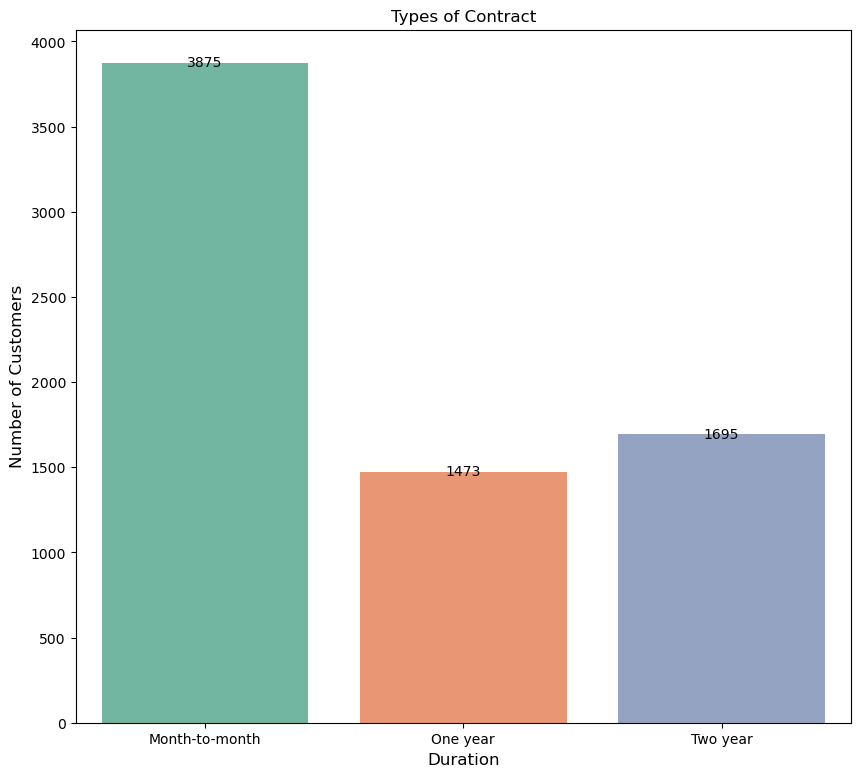

In [208]:
plt.figure(figsize=(10, 9))
c = sns.countplot(x=data['Contract'], palette='Set2')
plt.title('Types of Contract')
plt.xlabel('Duration', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

for p in c.patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(),
             format(p.get_height(), '.0f'),
             ha='center', va='center')

plt.show()

C:\Users\mruna\AppData\Local\Temp\ipykernel_18572\3042293379.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
C:\Users\mruna\AppData\Local\Temp\ipykernel_18572\3042293379.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[da

Text(0.5, 1.0, 'Two Year Contract')

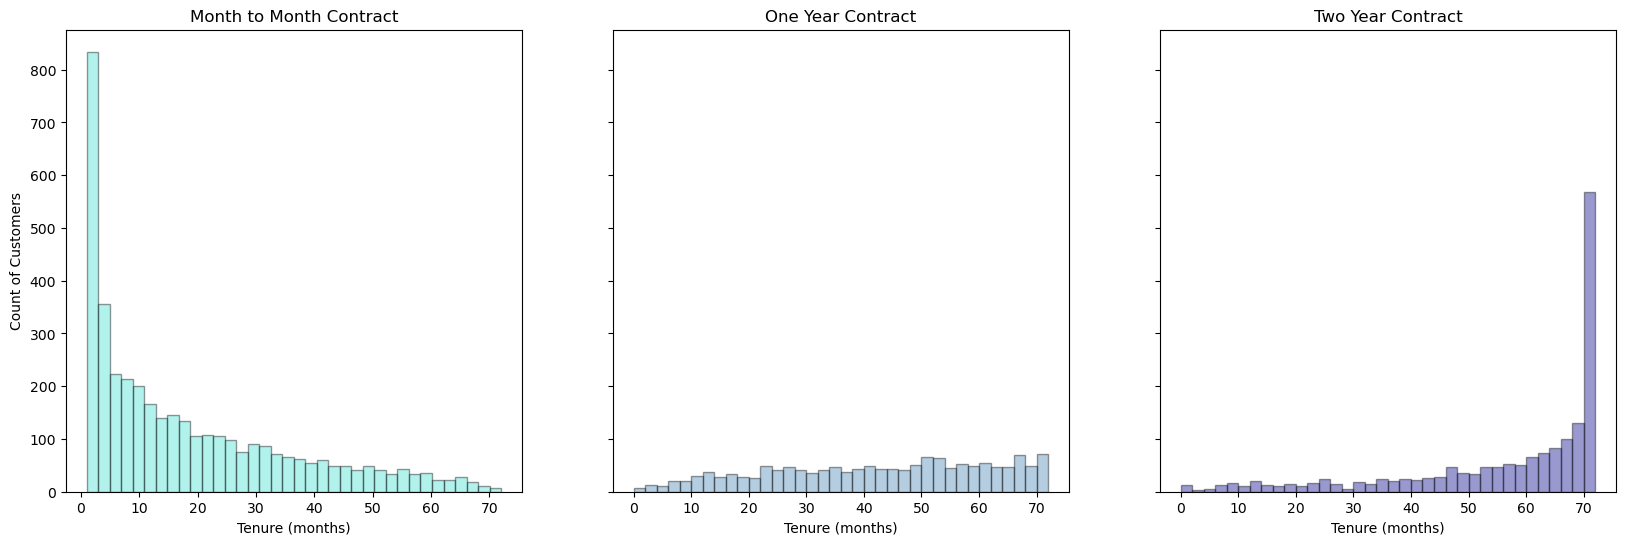

In [209]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('Count of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract')

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

### 12. Correlation Matrix

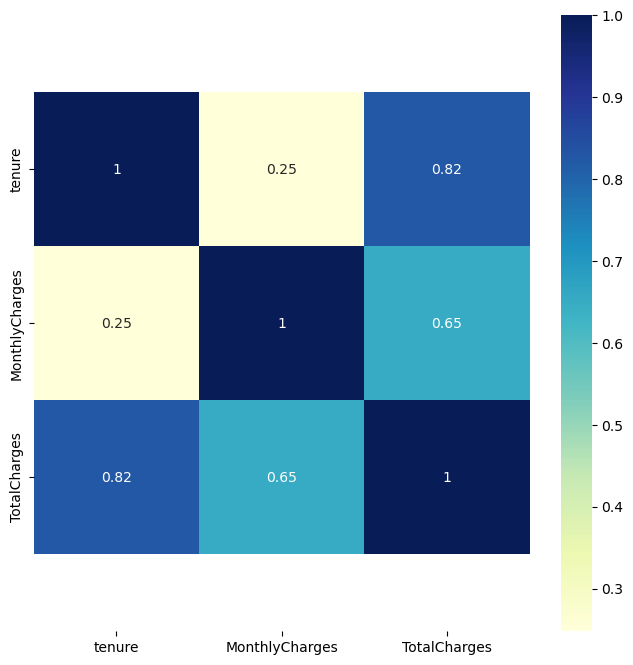

In [227]:
# Replace non-numeric values in 'TotalCharges' with NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Replace NaN values with the mean of the column
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

# Now, you can proceed with the correlation matrix plot
numeric_columns = ["tenure", "MonthlyCharges", "TotalCharges"]
data_numeric = data[numeric_columns]
data_corr = data_numeric.corr()

plt.figure(figsize=(8, 8))
ax = sns.heatmap(data_corr, annot=True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### 13. From the plots we can conclude that


C:\Users\mruna\AppData\Local\Temp\ipykernel_18572\61750907.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["tenure"], shade=True, color="blue")


Text(0, 0.5, 'Frequency')

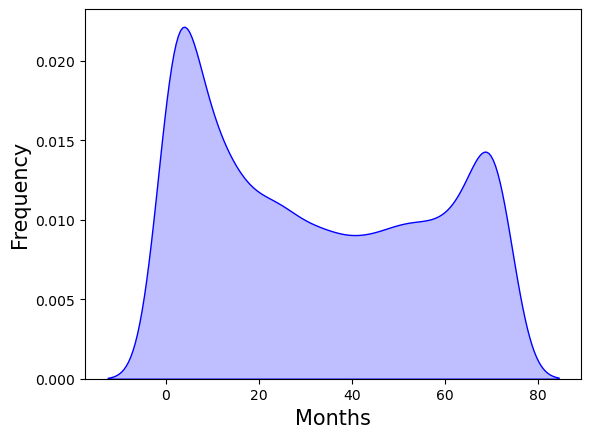

In [236]:
sns.kdeplot(data["tenure"], shade=True, color="blue")

plt.xlabel('Months', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

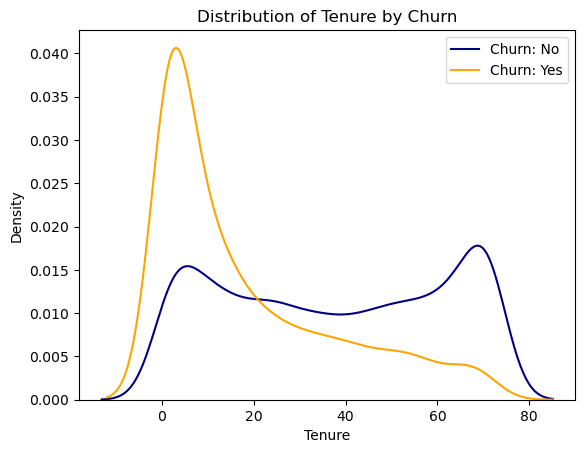

In [237]:
ax0 = sns.kdeplot(data[data['Churn'] == 'No']['tenure'].dropna(), color='navy', label='Churn: No')
ax1 = sns.kdeplot(data[data['Churn'] == 'Yes']['tenure'].dropna(), color='orange', label='Churn: Yes')

plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.legend()
plt.show()

C:\Users\mruna\AppData\Local\Temp\ipykernel_18572\1898357738.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["MonthlyCharges"], shade=True, color="red")


Text(0, 0.5, 'Frequency')

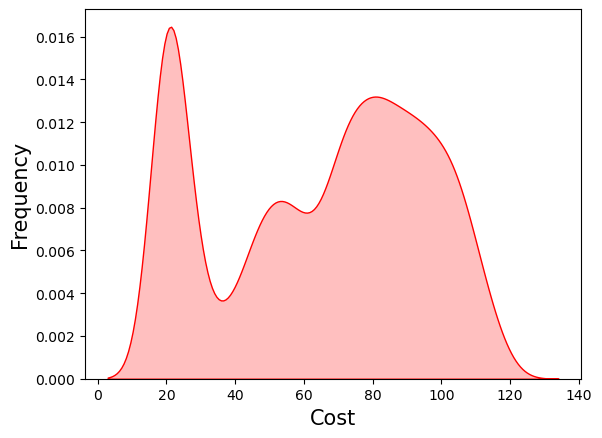

In [235]:
sns.kdeplot(data["MonthlyCharges"], shade=True, color="red")

plt.xlabel('Cost', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

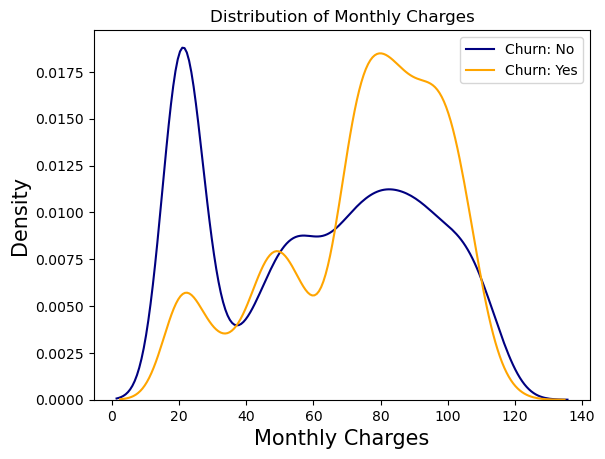

In [239]:
ax0 = sns.kdeplot(data[data['Churn'] == 'No']['MonthlyCharges'].dropna(), color='navy', label='Churn: No')
ax1 = sns.kdeplot(data[data['Churn'] == 'Yes']['MonthlyCharges'].dropna(), color='orange', label='Churn: Yes')

plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.legend()
plt.show()


C:\Users\mruna\AppData\Local\Temp\ipykernel_18572\3173856889.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["TotalCharges"], shade=True, color="green")


Text(0, 0.5, 'Frequency')

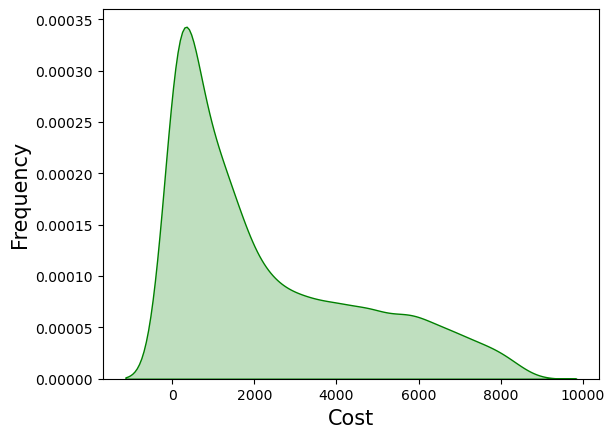

In [242]:
sns.kdeplot(data["TotalCharges"], shade=True, color="green")

plt.xlabel('Cost', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

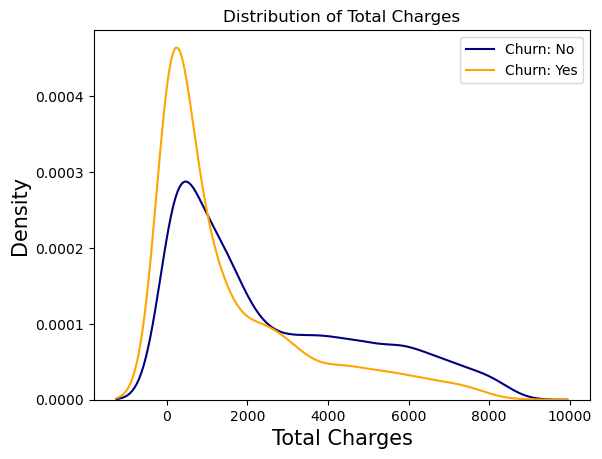

In [243]:
ax0 = sns.kdeplot(data[data['Churn'] == 'No']['TotalCharges'].dropna(), color= 'navy', label= 'Churn: No')
ax1 = sns.kdeplot(data[data['Churn'] == 'Yes']['TotalCharges'].dropna(), color= 'orange', label= 'Churn: Yes')

plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.legend()
plt.show()

### 14. Additional Service


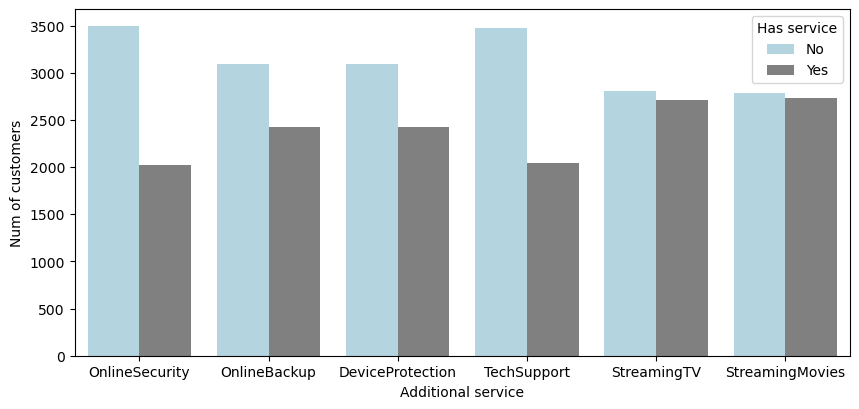

In [244]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(data[data["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

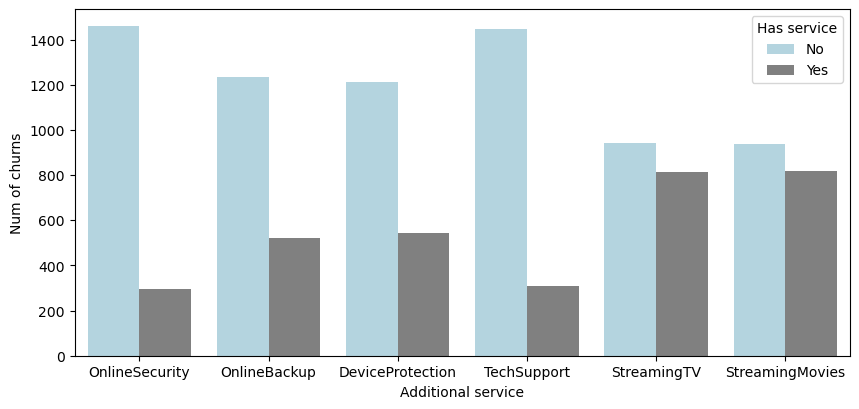

In [245]:
plt.figure(figsize=(10, 4.5))
df1 = data[(data.InternetService != "No") & (data.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

### 15. Machine Learning


In [254]:
# Assuming 'Churn' column is already converted to binary values (0 or 1)
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Ensure 'churn_rate' column exists before dropping it
if 'churn_rate' in data.columns:
    # Drop the 'churn_rate' column
    data2 = data.drop(['churn_rate'], axis=1)
else:
    # If 'churn_rate' doesn't exist, just use the original DataFrame
    data2 = data.copy()

# Include 'customerID' in the DataFrame
data2 = data2.drop('customerID', axis=1)  # Drop if 'customerID' already exists
data2['customerID'] = data['customerID']   # Add 'customerID' column to data2

# Display the updated DataFrame
data2.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [255]:
numerical = data2.select_dtypes(['number']).columns
print(f'Numerical: {numerical}\n')

categorical = data2.columns.difference(numerical)

data2[categorical] = data2[categorical].astype('object')
print(f'Categorical: {categorical}')

data2 = pd.get_dummies(data2)

Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

Categorical: Index(['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling',
       'Partner', 'PaymentMethod', 'PhoneService', 'StreamingMovies',
       'StreamingTV', 'TechSupport', 'gender'],
      dtype='object')


In [256]:
X = data2.drop('Churn', axis=1)

y = data2['Churn']

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

### 16. Data Seperation


In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

### 17. Logistic Regression

In [259]:
accuracy= {}

log = LogisticRegression()
log.fit(X_train, y_train)

log_y_pred = log.predict(X_test)
log_y_pred_train = log.predict(X_train)

c:\Users\mruna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [260]:
log_test_as = metrics.accuracy_score(log_y_pred, y_test)
log_train_as = metrics.accuracy_score(log_y_pred_train, y_train)

In [261]:
print(f"Accuracy score for test data : {log_test_as}")
print(f"Accuracy score for train data : {log_train_as}")

Accuracy score for test data : 0.8197303051809794
Accuracy score for train data : 0.8029818956336529


In [262]:
accuracy['LogisticRegression']= round(log.score(X_test,y_test)*100,2)

### 18. Suppoer Vector Machine (SVM)

In [263]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [264]:
y_pred_svc = svc.predict(X_test)
y_pred_train = svc.predict(X_train)

svc_train_as = metrics.accuracy_score(y_train, y_pred_train)
svc_as = metrics.accuracy_score(y_test, y_pred_svc)

In [265]:
print(f"Accuracy score for test data : {svc_as}")
print(f"Accuracy score for train data : {svc_train_as}")

Accuracy score for test data : 0.7352732434350603
Accuracy score for train data : 0.7344692935747249


### 19. SVM with Standard Scaler


In [266]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [267]:
svc_sc = SVC()
svc_sc.fit(X_train_sc, y_train)

y_pred_sc = svc_sc.predict(X_test_sc)
y_pred_sc_train = svc_sc.predict(X_train_sc)

svc_sc_train_as = metrics.accuracy_score(y_train, y_pred_sc_train)
svc_sc_as = metrics.accuracy_score(y_test, y_pred_sc)

accuracy['SVM']= round(svc_sc_as*100,2)

In [268]:
print(f"Accuracy score for test data : {svc_sc_as}")
print(f"Accuracy score for train data : {svc_sc_train_as}")

Accuracy score for test data : 0.8119233498935415
Accuracy score for train data : 0.8159389421370252


### 20. KNN


In [272]:
# Assuming you have your features and target variable
# Replace X and y with your actual feature and target variable names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X_test to NumPy array
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else np.ascontiguousarray(X_test)

# Convert X_train to contiguous NumPy array
X_train_contiguous = np.ascontiguousarray(X_train)

testscores = []
trainscores = []

for i in range(1, 10):
    model = KNeighborsClassifier(i)
    model.fit(X_train_contiguous, y_train)
    
    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train_contiguous)
    
    testscores.append(metrics.accuracy_score(y_test, test_pred))
    trainscores.append(metrics.accuracy_score(y_train, train_pred))


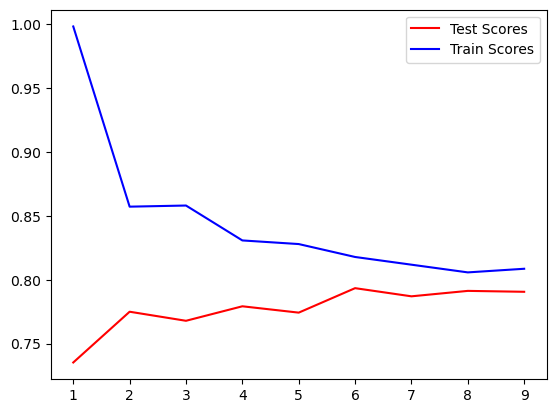

In [273]:
plt.plot(range(1, 10), testscores, label = 'Test Scores', color = 'red')

plt.plot(range(1, 10), trainscores, label = 'Train Scores', color = 'blue')

plt.legend();

In [275]:
# Assuming you have your features and target variable
# Replace X and y with your actual feature and target variable names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert X_test to NumPy array
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else np.ascontiguousarray(X_test)

# Convert X_train to contiguous NumPy array
X_train_contiguous = np.ascontiguousarray(X_train)

knn = KNeighborsClassifier(6)
knn.fit(X_train_contiguous, y_train)

y_pred_knn = knn.predict(X_test)

# Convert X_train to contiguous NumPy array before predicting
X_train_contiguous = np.ascontiguousarray(X_train)
y_pred_knn_train = knn.predict(X_train_contiguous)

# Continue with the rest of your code

In [276]:
knn_as = metrics.accuracy_score(y_test, y_pred_knn)
knn_as_train = metrics.accuracy_score(y_train, y_pred_knn_train)

In [277]:
accuracy['KNN']= round(knn.score(X_test,y_test)*100,2)

In [278]:
print(f"Accuracy score for test data : {knn_as}")
print(f"Accuracy score for train data : {knn_as_train}")

Accuracy score for test data : 0.7934705464868701
Accuracy score for train data : 0.8178913738019169


### 21. Decision Tree

In [279]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
y_pred_train_dt = decision_tree.predict(X_train)

c:\Users\mruna\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [280]:
accuracy['Decision Tree ']= round(decision_tree.score(X_test,y_test)*100,2)

c:\Users\mruna\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [281]:
dt_as = metrics.accuracy_score(y_test, y_pred_dt)
dt_as_train = metrics.accuracy_score(y_train, y_pred_train_dt)

print(f"Accuracy score for test data : {dt_as}")
print(f"Accuracy score for train data : {dt_as_train}")

Accuracy score for test data : 0.7182398864442867
Accuracy score for train data : 0.9985800496982605


### 22. Random Forest

In [282]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
y_pred_train_rf = random_forest.predict(X_train)

c:\Users\mruna\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [284]:
accuracy[' Random Forest']= round(random_forest.score(X_test,y_test)*100,2)

c:\Users\mruna\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [285]:
rf_as = metrics.accuracy_score(y_test, y_pred_rf)
rf_as_train = metrics.accuracy_score(y_train, y_pred_train_rf)

print(f"Accuracy score for test data : {rf_as}")
print(f"Accuracy score for train data : {rf_as_train}")

Accuracy score for test data : 0.794889992902768
Accuracy score for train data : 0.9985800496982605


### 23. Final Graph

C:\Users\mruna\AppData\Local\Temp\ipykernel_18572\2679538890.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  we= sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette='husl')


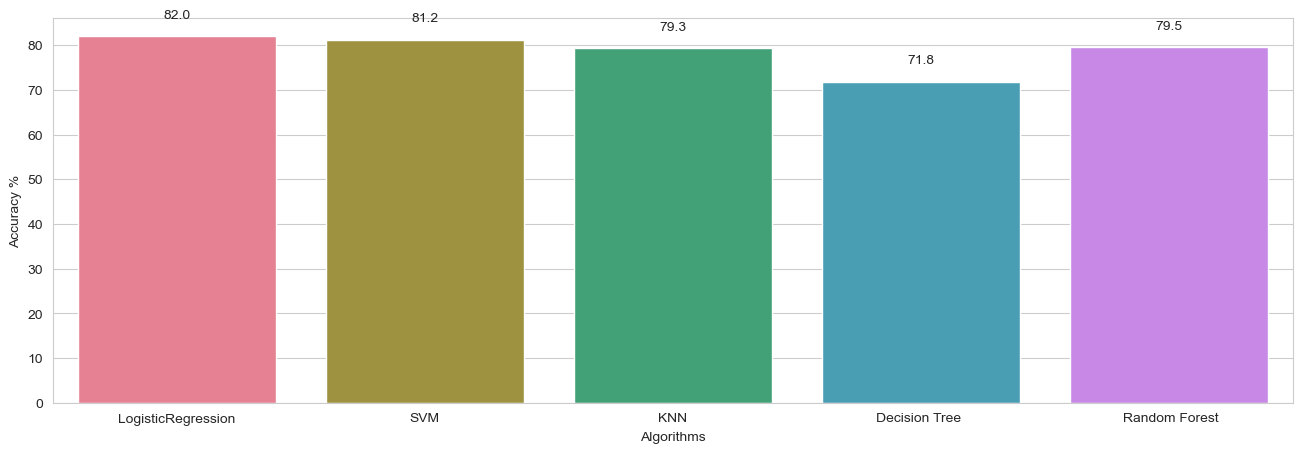

In [286]:
colors = ["purple", "green", "orange", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
we= sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette='husl')
# plt.show()
for p in we.patches:
    we.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 15), 
                   textcoords = 'offset points')